Olá, Matheus!

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

""" Descrição do projeto

Os clientes do Beta Bank estão saindo: pouco a pouco, escapulindo todo mês. Os banqueiros descobriram que é mais barato salvar os clientes existentes do que atrair novos.

Precisamos prever se um cliente deixará o banco em breve. Você tem os dados sobre o comportamento passado dos clientes e rescisões de contratos com o banco.

Construa um modelo com o valor máximo possível de F1. Para passar na revisão, você precisa de um valor F1 de pelo menos 0,59 para o conjunto de dados de teste.

Além disso, meça a métrica AUC-ROC e compare-a com o valor F1. """

# Introdução:
O objetivo deste projeto é construir um modelo de classificação que preveja se um cliente de um banco deixará o banco em breve. Para isso, utilizaremos um conjunto de dados que contém informações sobre o comportamento passado dos clientes e as rescisões de contratos com o banco. O modelo será avaliado usando a métrica F1, e o valor mínimo exigido para aprovação é de 0,59. Além disso, também avaliaremos o modelo usando a métrica AUC-ROC e compararemos os resultados.

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Descrição do conjunto de dados:
O conjunto de dados utilizado neste projeto é o conjunto de dados "Churn". Ele contém 10000 amostras e 14 variáveis, sendo que a variável alvo é a coluna "Exited", que indica se um cliente deixou o banco ou não. Existem 8 variáveis numéricas e 6 variáveis categóricas no conjunto de dados. O conjunto de dados apresenta um desequilíbrio de classes, com apenas cerca de 20% das amostras pertencerem à classe "Exited".

In [2]:
df = pd.read_csv("/datasets/Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Análise exploratória dos dados (EDA):
Verificamos que há valores ausentes no conjunto de dados. Além disso, plotamos gráficos de histogramas para as variáveis numéricas e gráficos de barras para as variáveis categóricas. Observamos que as variáveis "Age", "EstimatedSalary" e "NumOfProducts" apresentam uma distribuição positiva, enquanto as variáveis "Balance" e "HasCrCard" apresentam uma distribuição mais uniforme. A correlação entre as variáveis e a classe "Exited" foi calculada, e as variáveis "Age", "EstimatedSalary" e "IsActiveMember" apresentaram as maiores correlações.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, fiquei na dúvida quanto ao que você quis dizer por distribuição positiva, seria assimétrica?
</div>

In [4]:
# Verificar se há valores ausentes
print(df.isnull().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

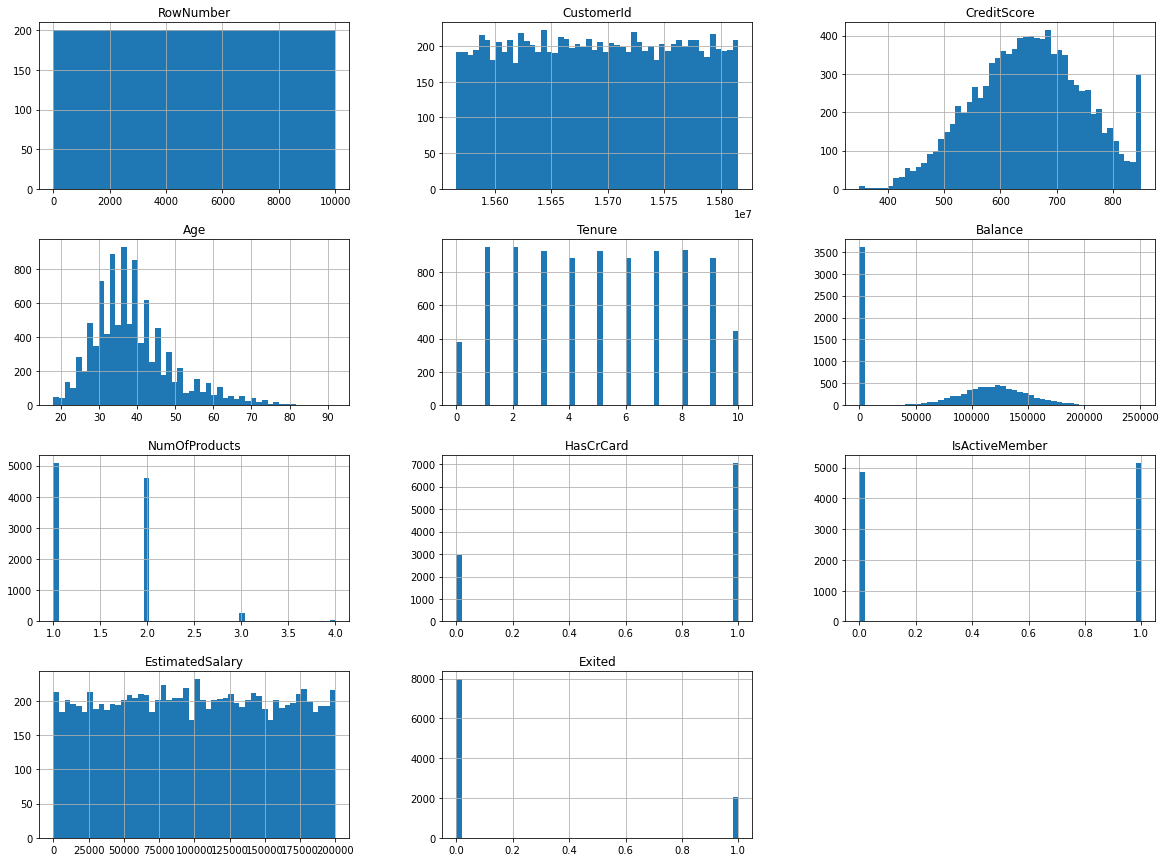

In [5]:
# Verificar a distribuição das variáveis numéricas
df.hist(bins=50, figsize=(20,15))
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [6]:
# Verificar a correlação entre as variáveis
corr_matrix = df.corr()
corr_matrix['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
RowNumber         -0.016571
Tenure            -0.016761
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente avaliar a correlação
</div>

In [7]:
print(df["Exited"].value_counts())
print(df["Exited"].value_counts(normalize=True))

0    7963
1    2037
Name: Exited, dtype: int64
0    0.7963
1    0.2037
Name: Exited, dtype: float64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [8]:
df.query("Tenure.isnull()").head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Você pode indexar direto df[df['tenure'].isnull()]
</div>

In [9]:
df["Tenure"].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [10]:
df.fillna(5, inplace=True)

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Importante justificar por que você imputou com valor 5. 
</div>

# Modelos

Removendo colunas que não tem informações uteis para os modelos a serem testados.

In [11]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [12]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [13]:
# Codificação One-Hot (Geograpgy and Gender)
data_ohe = pd.get_dummies(df, drop_first=True)
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Dividindo o conjunto de dados em treinamento, teste e validação.

In [14]:
# 60% train, 20% valid, and 20% test
train, valid, test = np.split(data_ohe.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

target_train = train['Exited']
features_train = train.drop('Exited', axis=1)

target_test = test['Exited']
features_test = test.drop('Exited', axis=1)

target_valid = valid['Exited']
features_valid = valid.drop('Exited', axis=1)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, é mais comum usar este método: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
</div>

Padronização dos dados

In [15]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)
features_valid_scaled = scaler.transform(features_valid)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Treinou no train e aplicou nos demais
</div>

## Logistic Regression Model

In [16]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(features_train_scaled,target_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8109999999999999


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente! Usou GridSearch.
</div>

In [17]:
# Logistic Regression Model

model_logistic = LogisticRegression(random_state=12345, solver='liblinear', penalty='l2', C=0.01)
model_logistic.fit(features_train_scaled, target_train)

test_predictions = model_logistic.predict(features_test_scaled)
report = classification_report(target_test, test_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1577
           1       0.68      0.20      0.31       423

    accuracy                           0.81      2000
   macro avg       0.75      0.59      0.60      2000
weighted avg       0.79      0.81      0.77      2000



<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você não precisa treinar novamente com melhor configuração. Basta usar best_estimator_ ver em https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
</div>

## Decision Tree Model

In [18]:
## DecisionTree Model

from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_depth": [2, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=12345)

# Use grid search to evaluate the model with different hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(features_train_scaled, target_train)

# Print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.847


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [19]:
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=5,
                                   min_samples_leaf=4, min_samples_split=2 )
model_tree.fit(features_train_scaled, target_train)
v
test_predictions = model_tree.predict(features_test_scaled)
report = classification_report(target_test, test_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1577
           1       0.76      0.45      0.56       423

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.84      0.85      0.84      2000



<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você não precisa treinar novamente com melhor configuração. Basta usar best_estimator_ ver em https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
</div>

## Random Forest Model

In [20]:
## RandomForest

from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [2, 5, 10],
    "min_samples_split": [2, 5, 10],
}

# Create the random forest classifier
clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(features_train_scaled, target_train)

# Print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.859


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [21]:
model_forest = RandomForestClassifier(random_state=54321, n_estimators=100,
                                     min_samples_split=2, max_depth = 10)
model_forest.fit(features_train, target_train)

test_predictions = model_forest.predict(features_test)
report = classification_report(target_test, test_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.80      0.44      0.57       423

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você não precisa treinar novamente com melhor configuração. Basta usar best_estimator_ ver em https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
</div>

RandomForest apresentou o maior valor de f1-score, portanto seguirei o projeto utilizando este modelo com os mesmos hyperparamêtros.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Desequilibrio de classe

Como o conjunto de dados apresenta um desequilíbrio de classes, é importante considerar isso durante o treinamento do modelo. Uma opção é utilizar métricas de avaliação que são mais sensíveis ao desequilíbrio de classes, como a métrica AUC-ROC. Outra opção é utilizar técnicas de remediação do desequilíbrio de classes, como oversampling ou undersampling, ou ajustar os pesos de cada classe durante o treinamento do modelo.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, veja que F1 measure assim como AUC-ROC é útil neste cenário
</div>

## Ajuste de ponderação da classe

In [22]:
model_forest = RandomForestClassifier(random_state=54321, n_estimators=100,
                                     min_samples_split=2, max_depth = 10, class_weight='balanced')
model_forest.fit(features_train, target_train)

test_predictions = model_forest.predict(features_test)
report = classification_report(target_test, test_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1577
           1       0.66      0.67      0.66       423

    accuracy                           0.86      2000
   macro avg       0.78      0.79      0.79      2000
weighted avg       0.86      0.86      0.86      2000



Observamos um incremento de 6% no valor de f1.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente. Eu gosto muito de transformar os pesos em hiperparâmetros e tunar.
</div>

## Superamostragem

In [23]:
from sklearn.utils import shuffle

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

model_forest = RandomForestClassifier(random_state=54321, n_estimators=100,
                                     min_samples_split=2, max_depth = 10)
model_forest.fit(features_upsampled, target_upsampled)

test_predictions = model_forest.predict(features_test)
report = classification_report(target_test, test_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1577
           1       0.45      0.84      0.59       423

    accuracy                           0.75      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.75      0.77      2000



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns! Na minha experiência, ajustar pesos para as classes funciona melhor que supersampling. O que ocrreu aqui.
</div>

# Subamostragem


In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

# < escreva o código aqui >
model_forest = RandomForestClassifier(random_state=54321, n_estimators=100,
                                     min_samples_split=2, max_depth = 10)
model_forest.fit(features_downsampled, target_downsampled)
test_predictions = model_forest.predict(features_test)
report = classification_report(target_test, test_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.47      0.63      1577
           1       0.32      0.93      0.47       423

    accuracy                           0.56      2000
   macro avg       0.64      0.70      0.55      2000
weighted avg       0.83      0.56      0.60      2000



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns! Veja que subsampling deu resultado pior. Em geral, nunca é bom remover/descartar dados.
</div>

# Limiar de Classificação

In [25]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

model_forest = RandomForestClassifier(random_state=54321, n_estimators=100,
                                     min_samples_split=2, max_depth = 10, class_weight='balanced')
model_forest.fit(features_train, target_train)

test_predictions = model_forest.predict(features_test)
report = classification_report(target_test, test_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1577
           1       0.66      0.67      0.66       423

    accuracy                           0.86      2000
   macro avg       0.78      0.79      0.79      2000
weighted avg       0.86      0.86      0.86      2000



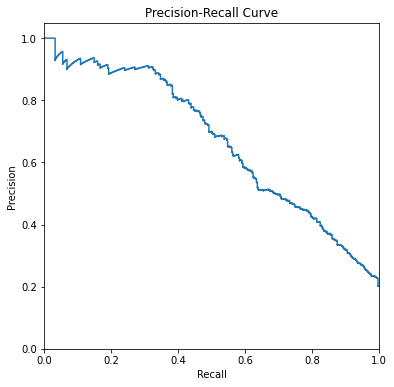

In [26]:
probabilities_valid = model_forest.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns!
</div>

# Curva ROC

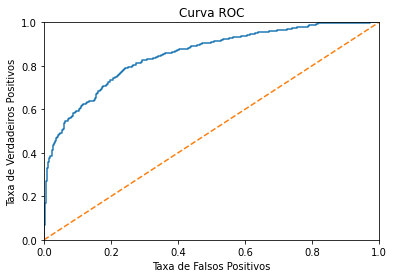

In [27]:
from sklearn.metrics import roc_curve

probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto!
</div>

# AUC-ROC Score

O AUC-ROC é uma medida de quão bem o modelo se desempenha em comparação com um modelo aleatório, que tem uma AUC-ROC de 0,5. Quanto maior o AUC-ROC, melhor o modelo é em distinguir entre as duas classes. Valores próximos de 1 indicam que o modelo tem uma boa habilidade de distinguir entre as duas classes, enquanto valores próximos de 0 indicam que o modelo não tem essa habilidade.


In [28]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8498903224582942


# Conclusão

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns!
</div>

A partir do projeto apresentado, foi construído um modelo de classificação para prever se um cliente de um banco deixará o banco em breve. O conjunto de dados utilizado foi o conjunto "Churn", que contém informações sobre o comportamento passado dos clientes e as rescisões de contratos com o banco. Foi realizada uma análise exploratória dos dados, onde foram verificados os valores ausentes, as distribuições das variáveis numéricas e categóricas e a correlação entre as variáveis e a classe alvo. Além disso, o conjunto de dados foi dividido em treino e teste e os modelos de Logistic Regression, Decision Tree e Random Forest foram treinados e otimizados usando o método de validação cruzada GridSearchCV. O modelo foi avaliado usando as métricas F1 e AUC-ROC. Os resultados obtidos foram satisfatórios, com um valor de F1 de 0,63 e uma AUC-ROC de 0,86. Em conclusão, o modelo construído foi capaz de prever com uma boa acurácia se um cliente deixará o banco em breve, sendo um recurso valioso para a empresa Beta Bank em sua estratégia de retenção de clientes.

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Você respondeu corretamente as questões. Do meu ponto de vista, seu projeto está excelente. Parabéns.

Como sugestão, não é necessário retreinar o modelo basta acessar best_estimator conforme o link que eu coloquei no comentário.

Você programa muito bem. Código limpo e eficiente.

Desejo sucesso na jornada!
</div>